# Customer Segmentation

The dataset includes annual sales to customers by a distributor.
Our goal is to use unsupervised learning, specifically clustering analysis, to divide customers into distinct segments. This aims to help the distributor gain insights into customer profiles.

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Variable Description:

FRESH:	Annual spending on fresh products


MILK:	Annual spending on milk products

GROCERY:	Annual spending on grocery products

FROZEN:	Annual spending on frozen products

DETERGENT/PAPER:	Annual spending on detergent and paper products

DELICATESSEN:	Annual spending on delicatessen products

Since 'Region' and 'Channel' are categorical variables, we will not include them in the analysis.

In [4]:
df.shape

(440, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Feom data description, we can observe that the standard deviations of the data are quite high, and the data does not conform to a normal distribution.

In [7]:
corr = df.corr()
corr

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### Exploratory Data Analysis (EDA) - Categorical Data: **Channel Variable**

The **'Channel'** variable represents the purchase channels used by customers. These channels are categorized as **Hotel/Restaurant/Café** or **Retail**.

- **Variable Type:** Categorical  
- **Unique Values:** 2  
- **Distribution:** Imbalanced, with the channel coded as **1** being predominant.

In [8]:
df['Channel'].unique()

array([2, 1])

<Axes: ylabel='count'>

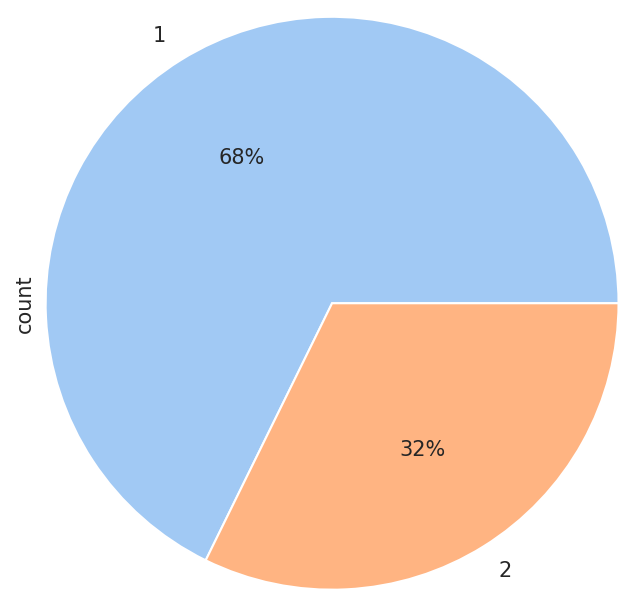

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5), dpi=150)
plt.subplot(121)
df['Channel'].value_counts().plot(kind='pie', autopct='%2.f%%', radius=1.24, colors=sns.color_palette('pastel'))

### Exploratory Data Analysis (EDA) - Categorical Data: **Region Variable**

The **'Region'** variable represents the regions where customers make purchases, categorized as **Istanbul**, **Izmir**, or **Ankara**.

- **Variable Type:** Categorical  
- **Unique Values:** 3  
- **Distribution:** Imbalanced, with the region coded as **3** being predominant. The imbalance in this variable is more pronounced compared to the **Channel** variable.

In [10]:
df['Region'].unique()

array([3, 1, 2])

,count
Region,
3,316
1,77
2,47


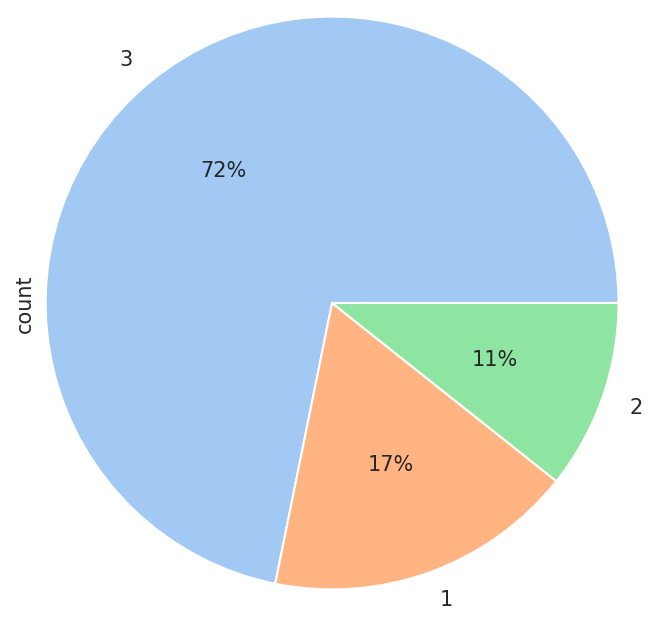

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5), dpi=150)
plt.subplot(121)
df['Region'].value_counts().plot(kind='pie', autopct='%2.f%%', radius=1.24, colors=sns.color_palette('pastel'))
df['Region'].value_counts()

# Numerical Variables

In [12]:
# Drop categorical variables
df.drop(['Region', 'Channel'], axis=1, inplace=True)

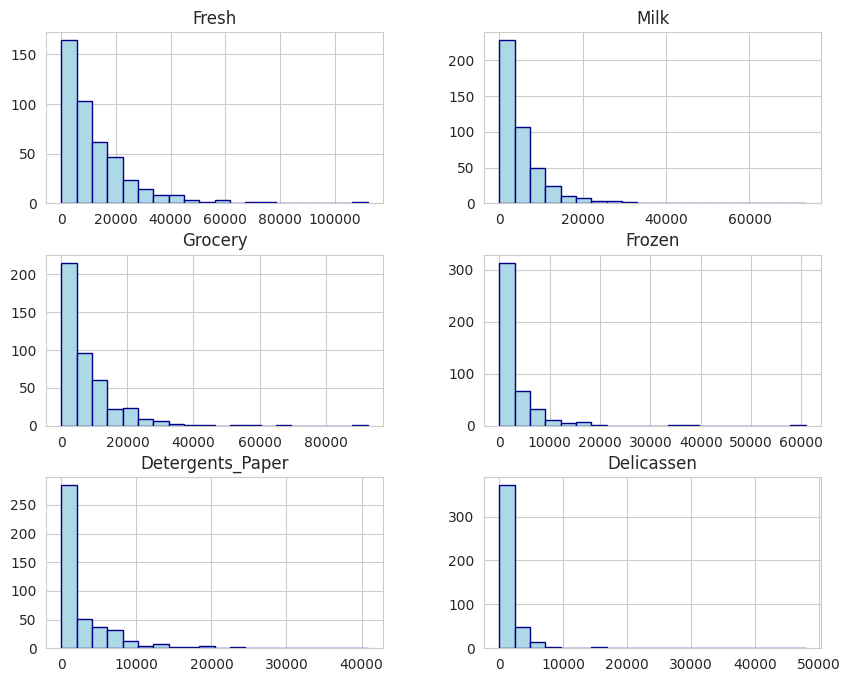

In [18]:
df.hist(figsize=(10,8),bins=20, color='lightblue', edgecolor='darkblue')
plt.show()

From this output, we can infer that the distributions of the variables are highly skewed, which suggests an imbalance in the data. This skewness may indicate the presence of outliers or certain categories that dominate the distribution.

# Skewness

In [19]:
import pandas as pd
skewness = df.skew()
def skew_category(value):
    if value > 1:
        return 'High Skewness (Positive)'
    elif value < -1:
        return 'High Skewness (Negative)'
    elif value > 0.5:
        return 'Moderate Skewness (Positive)'
    elif value < -0.5:
        return 'Moderate Skewness (Negative)'
    else:
        return 'Low Skewness'
skewness_category = skewness.apply(skew_category)
print(pd.DataFrame({'Skewness': skewness, 'Category': skewness_category}))


                   Skewness                  Category
Fresh              2.561323  High Skewness (Positive)
Milk               4.053755  High Skewness (Positive)
Grocery            3.587429  High Skewness (Positive)
Frozen             5.907986  High Skewness (Positive)
Detergents_Paper   3.631851  High Skewness (Positive)
Delicassen        11.151586  High Skewness (Positive)


### Logarithmic Transformation for Skewed Data

The data distributions are highly skewed, which may affect clustering due to extreme distance measurements. To improve this, we'll apply a logarithmic transformation to make the data more symmetric.

#### Key Considerations:
1. **Right-Skewed Data:** Log transformation is effective for right-skewed distributions.
2. **Positive Values Only:** Ensure there are no zero or negative values in the dataset.
3. **Balanced Variables:** It helps when variables have equal importance in clustering.

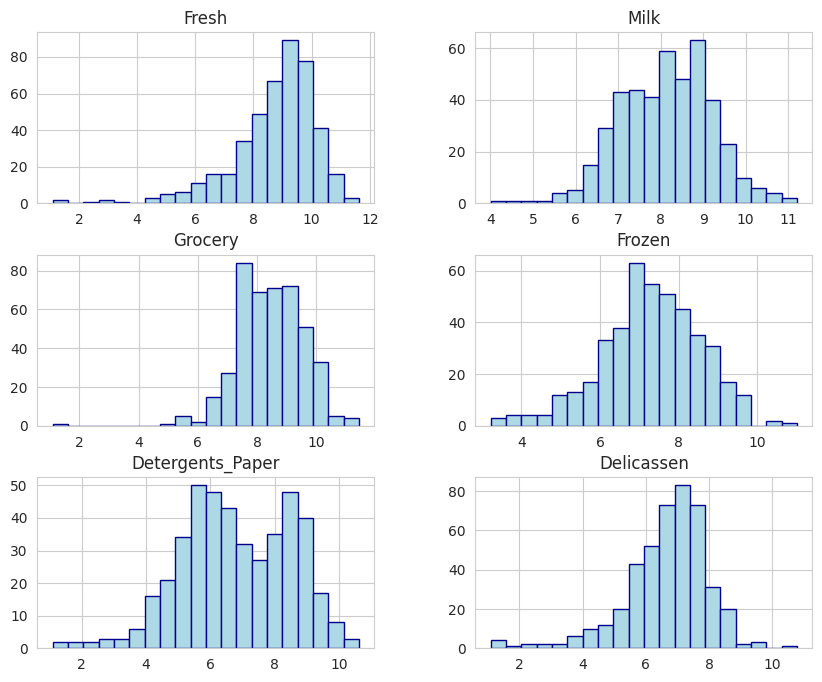

In [20]:
# log transform
df = np.log(df)
df.hist(figsize=(10,8),bins=20, color='lightblue', edgecolor='darkblue')
plt.show()

After the transformation, the data has become more balanced.

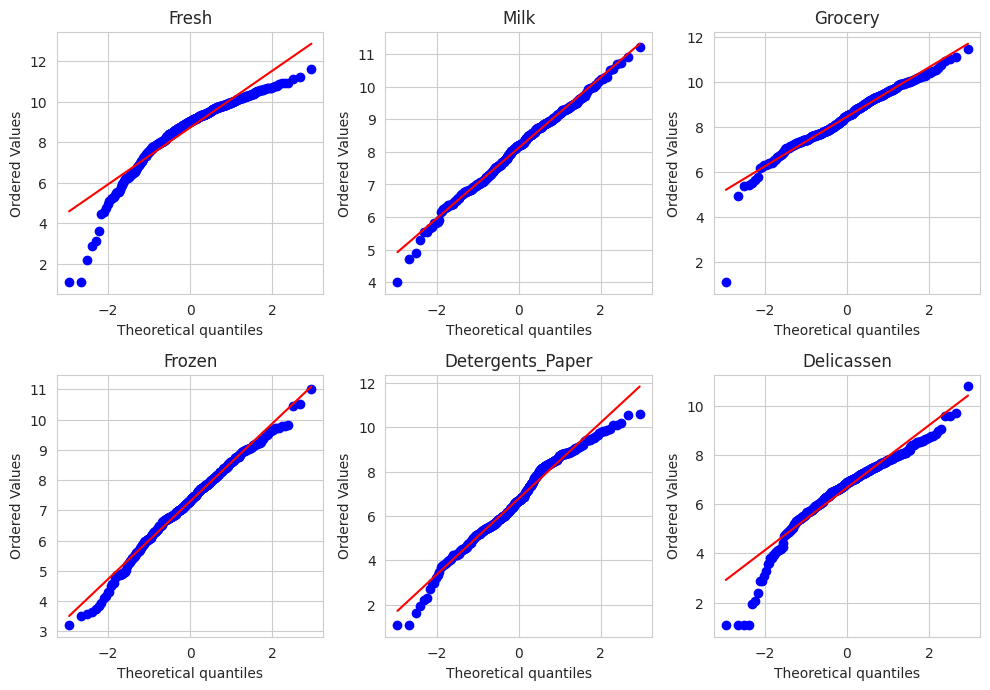

In [22]:
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.figure(figsize=(10,10))
for i, var in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    stats.probplot(df[var], plot=plt)
    plt.title(f'{var}')
plt.tight_layout()
plt.show()


The variables generally exhibit a normal distribution. However, from this output, it is apparent that there may be potential outliers in the dataset.

# Box Plot

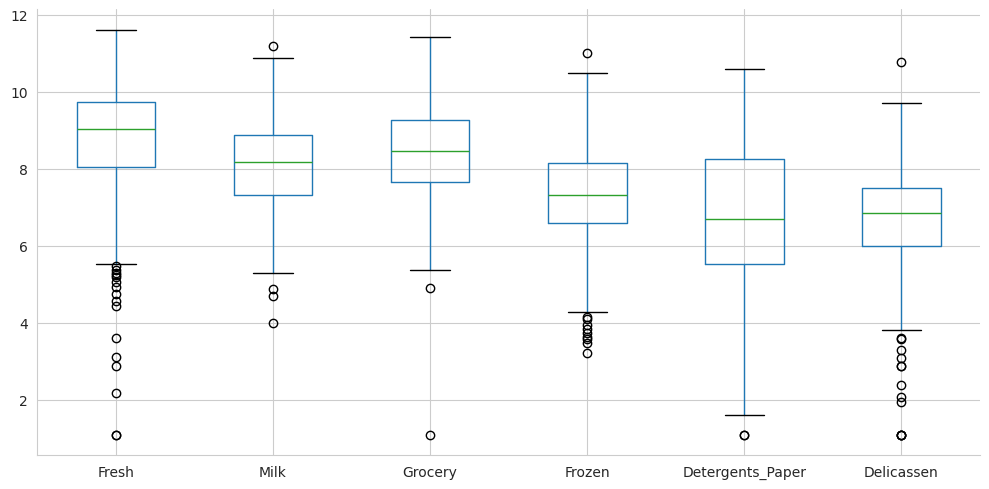

In [23]:
plt.figure(figsize=(10, 5))
df.boxplot()
sns.despine()
plt.tight_layout()
plt.show()

# Correlation Matrix

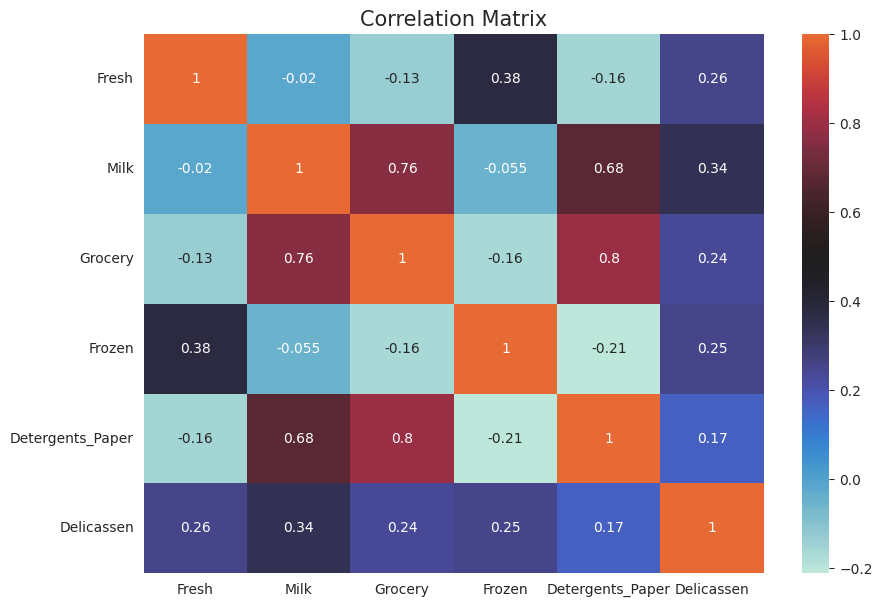

In [27]:
corr=df.corr()
plt.figure(figsize=(10,7))
plt.title('Correlation Matrix',fontsize=15)
sns.heatmap(corr, center=0.5,annot=True)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

'Grocery', 'Detergents_Paper', and 'Milk' have shown high correlation.

# Data Preprocessing


# Outlier Analysis

To identify outliers and equalize these values to lower and upper bounds.

In [28]:
import numpy as np
for column in df.columns:
    q25, q75 = np.percentile(df[column], [25, 75])
    iqr = q75 - q25
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr
for i in df.keys():
    q25, q75 = np.percentile(df[i], [25,75])
    iqr = q75 - q25

    lower_bound = q25 - iqr*1.5
    upper_bound = q75 + iqr*1.5

    df.loc[df[i] < lower_bound, i] = lower_bound
    df.loc[df[i] > upper_bound, i] = upper_bound

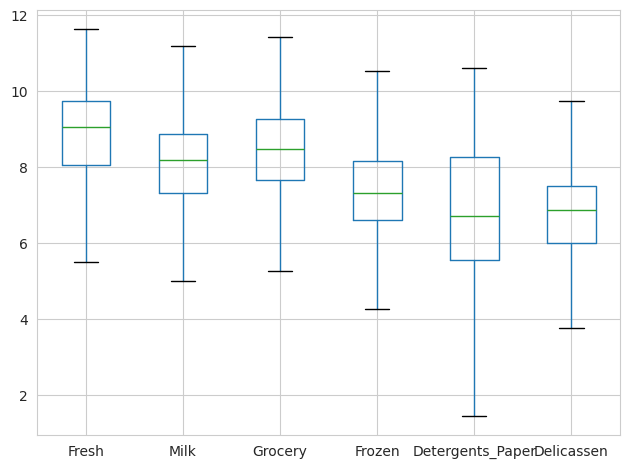

In [29]:
df.boxplot()
plt.tight_layout()
plt.show()

In [30]:
df.isnull().sum()

,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [31]:
df.duplicated().sum()

0

### Standardization

Since we are performing clustering, the distances between data points are crucial. Standardizing the data ensures that variables with different units or value ranges do not disproportionately influence the results. By standardizing, we transform the data to have a mean of 0 and a standard deviation of 1, which helps ensure that each variable contributes equally to the clustering process.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

### Clustering

In the **K-means** algorithm, the number of clusters must be predetermined. To determine the optimal number of clusters, we will use a **dendrogram** created through **hierarchical clustering**. The dendrogram will allow us to visually assess the suitable number of clusters by showing how data points are merged together at various similarity levels.

For creating homogeneous structures within each cluster and heterogeneous structures between clusters, we will then apply **non-hierarchical clustering** methods, such as K-means.

#### Dendrogram
Since the dataset consists mainly of numerical variables (excluding categorical data), we will use **Euclidean distance** to measure the similarity between data points when building the dendrogram. This approach will help us visualize how data points group together and guide us in selecting the right number of clusters.

In [34]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, cophenet

# Step 1: Calculate the Euclidean distances between the data points
# `df` is the DataFrame containing the numerical data
euclidean_distances = pdist(df, metric='euclidean')

# Step 2: Create the hierarchical clustering linkage matrix
# This matrix describes the hierarchical clustering using the average linkage method
cluster_hierarchy = linkage(euclidean_distances, method='average')

# Step 3: Calculate the cophenetic correlation coefficient
# This helps measure how well the dendrogram represents the original distances
coph_corr, coph_dist = cophenet(cluster_hierarchy, euclidean_distances)

# Step 4: Generate a list of observation names (just an index for each row in the DataFrame)
observation_names = np.arange(0, df.shape[0]).tolist()

# Print the cophenetic correlation coefficient
print(f"Cophenetic Correlation Coefficient: {coph_corr}")

Cophenetic Correlation Coefficient: 0.6448497671919403


looking at the Cophenetic Correlation Coefficient (CCC) value, it can be seen that the dendrogram moderately reflects similarities in the dataset.

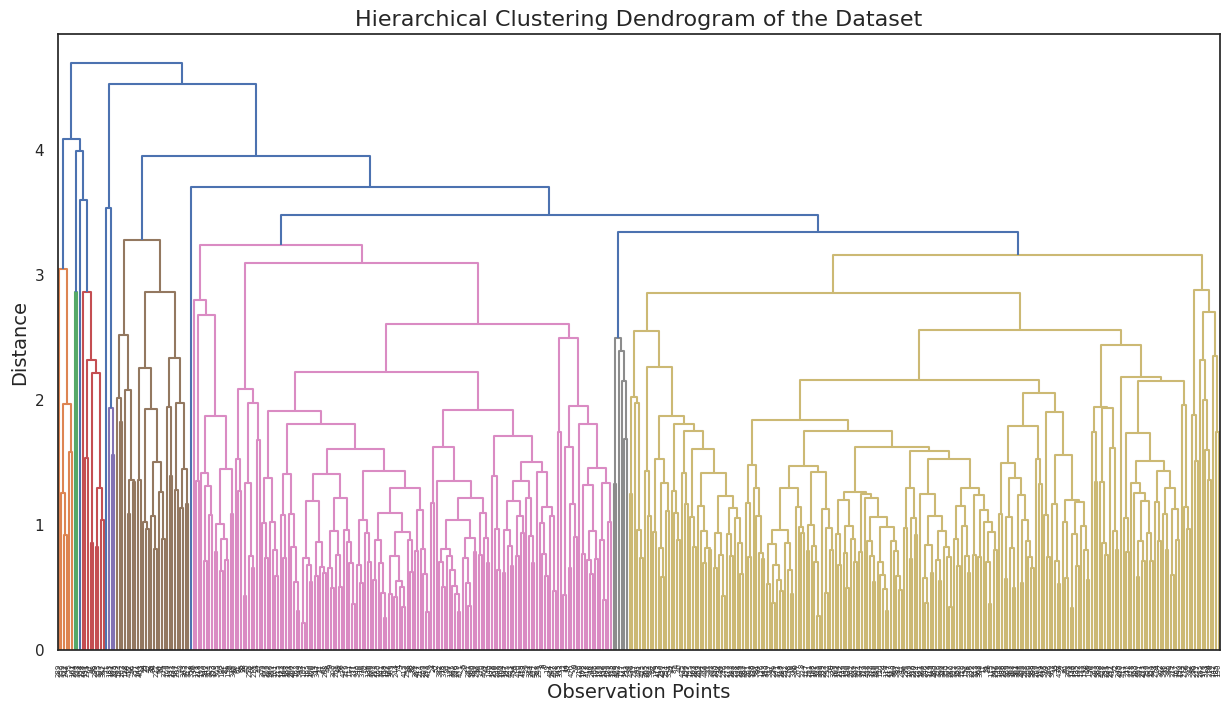

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram

sns.set()
sns.set_style('white')

plt.figure(figsize=(15, 8))

dendrogram(cluster_hierarchy, labels=observation_names)

plt.title('Hierarchical Clustering Dendrogram of the Dataset', fontsize=16)
plt.xlabel('Observation Points', fontsize=14)
plt.ylabel('Distance', fontsize=14)

plt.show()


### Cluster Selection from Dendrogram

After reviewing the **dendrogram** plot, it would be appropriate to **determine 6 clusters**. The decision is based on where the vertical lines show a significant increase in distance, indicating natural separation in the data.

Now, we can proceed to **apply clustering** with **6 clusters** using a non-hierarchical clustering method like **K-means**. This will help group the observations into 6 distinct clusters based on their similarities.

# K-Means

In [37]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=6)
kmeans.fit(df)
labels = kmeans.labels_

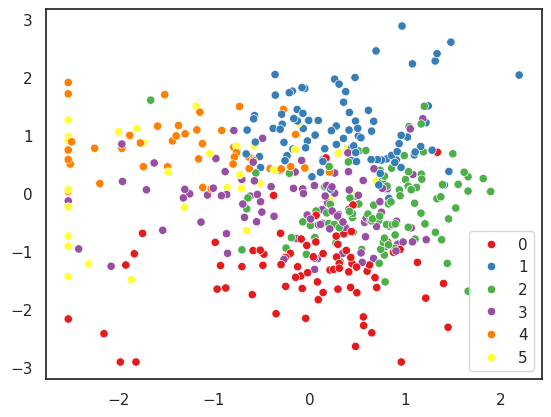

In [38]:
sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=labels, palette='Set1')
plt.show()

# DBSCAN

In [39]:
dbscan = DBSCAN(eps=1)
dbscan.fit(df)
labels_dbscan = dbscan.labels_

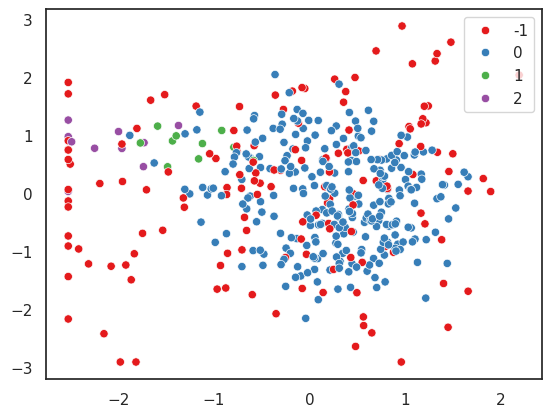

In [41]:
sns.scatterplot(x=df[:, 0], y=df[:, 1], hue=labels_dbscan, palette='Set1')
plt.show()

# Gaussian Mixture

In [42]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(df)
labels_gmm = gmm.predict(df)
centers_gmm = gmm.means_
n_clusters = len(centers_gmm)

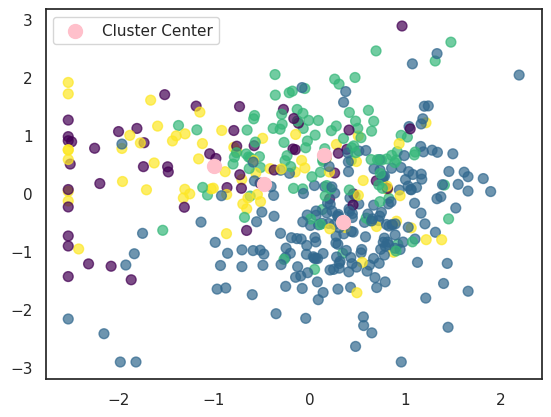

In [44]:
import matplotlib.pyplot as plt
plt.scatter(df[:, 0], df[:, 1], c=labels_gmm, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centers_gmm[:, 0], centers_gmm[:, 1], c='pink', s=100, marker='o', label='Cluster Center')
plt.legend()
plt.show()

# PCA

In [46]:
model = PCA(n_components=2)
pca_df = model.fit_transform(df)
model = KMeans(n_clusters=6)
model.fit(pca_df)
prediction2 = model.predict(pca_df)

In [47]:
prediction2.shape

(440,)

In [48]:
centers = model.cluster_centers_
centers

array([[-2.63137562, -0.64266983],
       [ 1.91880732,  0.31086101],
       [-1.15486119,  0.65578014],
       [ 1.70562094, -1.99429649],
       [-0.30741307, -0.8411166 ],
       [ 0.55686062,  1.77773122]])

In [49]:
prediction_0 = prediction2 == 0
prediction_1 = prediction2 == 1

In [50]:
x_0 = pca_df[prediction_0, 0]
y_0 = pca_df[prediction_0, 1]
x_1 = pca_df[prediction_1, 0]
y_1 = pca_df[prediction_1, 1]

In [51]:
center_x_0 = centers[0,0]
center_y_0 = centers[0,1]
center_x_1 = centers[1,0]
center_y_1 = centers[1,1]

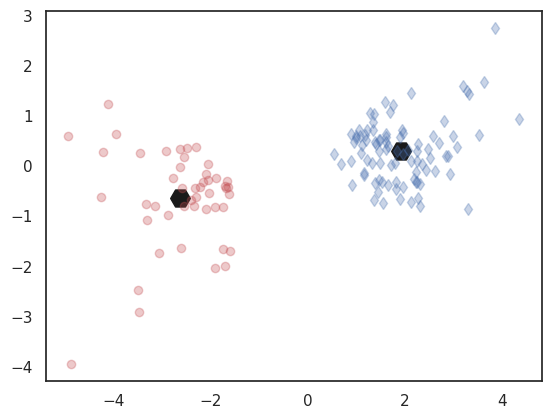

In [52]:
plt.plot(x_0, y_0, 'ro', alpha=0.3)
plt.plot(x_1, y_1, 'bd', alpha=0.3)
plt.scatter(center_x_0, center_y_0, marker='H', s=200, c='k')
plt.scatter(center_x_1, center_y_1, marker='H', s=200, c='k')
plt.show()